# Convolutional Neural Networks

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from keras.datasets import cifar10

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, AvgPool2D, Flatten, Activation
import keras.backend as K

### Image filters with convolutions

In [4]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [5]:
img = misc.ascent()

In [6]:
img.shape

(512, 512)

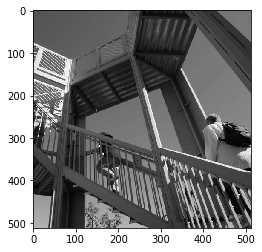

In [9]:
plt.imshow(img, cmap='gray')

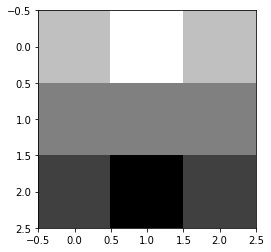

In [18]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])
plt.imshow(h_kernel, cmap='gray')

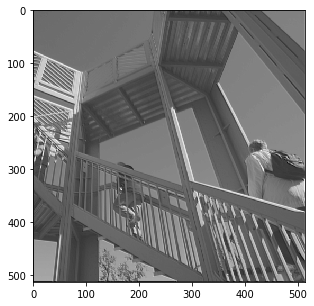

In [22]:
res = convolve2d(img, h_kernel)

plt.figure(figsize=(5, 5))
plt.imshow(res, cmap='gray')

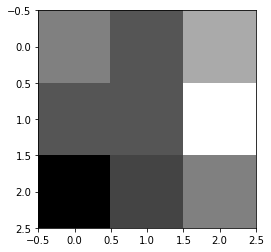

In [21]:
h_kernel = np.array([[0.5,  0,  1],
                     [ 0,  0,  2],
                     [-1, -0.2, 0.5]])
plt.imshow(h_kernel, cmap='gray')

### Load CIFAR-10 dataset (Canadian Institute For Advanced Research)

In [84]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [85]:
print (X_train.shape)
print (X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=0.2)

In [88]:
print (X_train.shape)
print (X_test.shape)

(20000, 32, 32, 3)
(5000, 32, 32, 3)


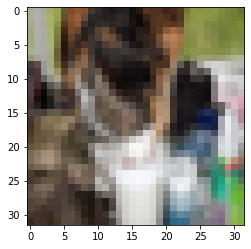

In [89]:
plt.imshow(X_train[0])

In [90]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [91]:
y_train.shape

(20000, 1)

In [92]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [93]:
y_train_cat.shape

(20000, 10)

### Reset and Initialising the CNN

In [94]:
K.clear_session()
model = Sequential()

### Convolution

#### Convolution Layer - ConvNet1

In [95]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

#### Convolution Layer - ConvNet2

In [96]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

#### Fully Connected Layer

In [97]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Model Archtecture

In [98]:
model.layers

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

### Compiling the CNN

In [100]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [101]:
# model.fit(X_train, y_train_cat,
#           batch_size=32,
#           epochs=10,
#           validation_data=(X_test, y_test_cat),
#           shuffle=True)

In [102]:
model.fit(X_train, y_train_cat, 
          batch_size=32,
          epochs=10,
          validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 66s 4ms/step - loss: 1.7596 - acc: 0.3614 - val_loss: 1.3974 - val_acc: 0.4915
Epoch 2/10
16000/16000 [==============================] - 64s 4ms/step - loss: 1.2817 - acc: 0.5483 - val_loss: 1.3158 - val_acc: 0.5555
Epoch 3/10
16000/16000 [==============================] - 65s 4ms/step - loss: 1.0267 - acc: 0.6390 - val_loss: 1.1833 - val_acc: 0.5907
Epoch 4/10
16000/16000 [==============================] - 64s 4ms/step - loss: 0.8349 - acc: 0.7044 - val_loss: 1.0901 - val_acc: 0.6265
Epoch 5/10
16000/16000 [==============================] - 64s 4ms/step - loss: 0.6748 - acc: 0.7659 - val_loss: 0.9573 - val_acc: 0.6825
Epoch 6/10
16000/16000 [==============================] - 64s 4ms/step - loss: 0.5151 - acc: 0.8221 - val_loss: 1.1079 - val_acc: 0.6803
Epoch 7/10
16000/16000 [==============================] - 64s 4ms/step - loss: 0.3698 - acc: 0.8718 - val_loss: 1.1547 - val_acc:

### Evaluate on Test Set

In [83]:
model.evaluate(X_test, y_test_cat)

2000/2000 [==============================] - 3s 1ms/step


[2.2134465007781983, 0.574]